# Load Contact Maps from Pickle File

### Import Modules

In [22]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Specify Simulation

In [2]:
output_dir = "/scratch/users/jwakim/chromo_two_mark_phase_transition/output"
sim_ind = 35
sim_dir = f"{output_dir}/sim_{sim_ind}"
log_contact_map_path = f"{sim_dir}/log_detailed_contact_map.csv"

### Verify that the Contact Map Exists

If the contact map does not exist, you can use `cmap_detailed.py` to generate it. The script is annotated in the Jupyter notebook `detailed_simulation_cmap.ipynb`.

In [4]:
file_exists = os.path.exists(log_contact_map_path)

if not file_exists:
    raise ValueError(f"Contact map not found at path: {log_contact_map_path}")

### Load the Contact Map

In [11]:
cmap = pd.read_csv(log_contact_map_path, header=None, sep=" ").to_numpy()

### Plot Contact Map

In [12]:
cmap_plot = cmap.copy()
upper_percentile_signals = np.percentile(cmap_plot, 99)
max_scale = 5
cmap_plot *= max_scale / upper_percentile_signals

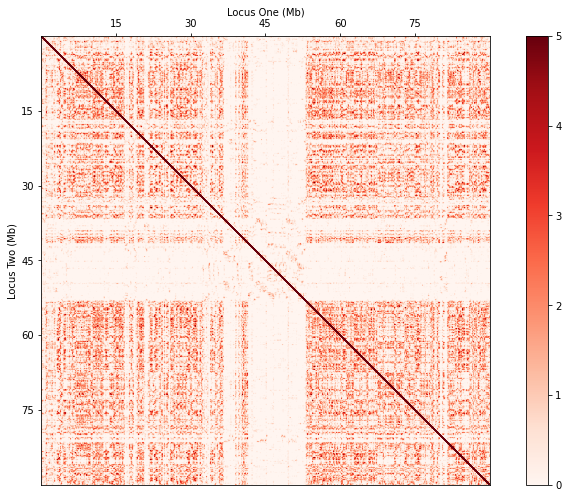

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [0, 90, 90, 0]
im = ax.imshow(cmap_plot, cmap="Reds", extent=extents, vmin=0, vmax=max_scale)
ax.set_xticks([15, 30, 45, 60, 75])
ax.set_yticks([15, 30, 45, 60, 75])
ticks = np.arange(max_scale+1)
boundaries = np.linspace(0, max_scale, 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

### Plot Contact Map for Comparison with MacPherson et al.

In [17]:
max_ind = len(cmap_plot) - 1
lower_bound = int(round((5 / 90) * max_ind))
upper_bound = int(round((35 / 90) * max_ind))
cmap_plot_MacPherson = cmap_plot[lower_bound:upper_bound, lower_bound:upper_bound]

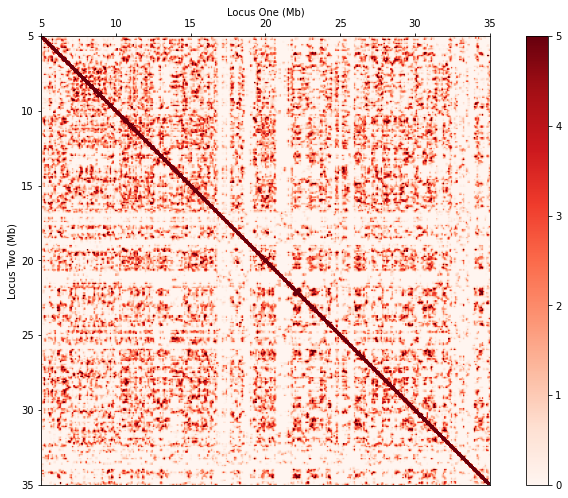

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(cmap_plot_MacPherson, cmap="Reds", extent=extents, vmin=0, vmax=max_scale)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(max_scale+1)
boundaries = np.linspace(0, max_scale, 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()